In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import joblib


import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
import os
data_path = "../data/customers.csv"
df = pd.read_csv(data_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# drop rows not needed
df.drop(columns = ['RowNumber', 'CustomerId'], axis = 1, inplace = True)

In [8]:
# eda
numerical_features = df.select_dtypes(include = 'number').columns.tolist()
numerical_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

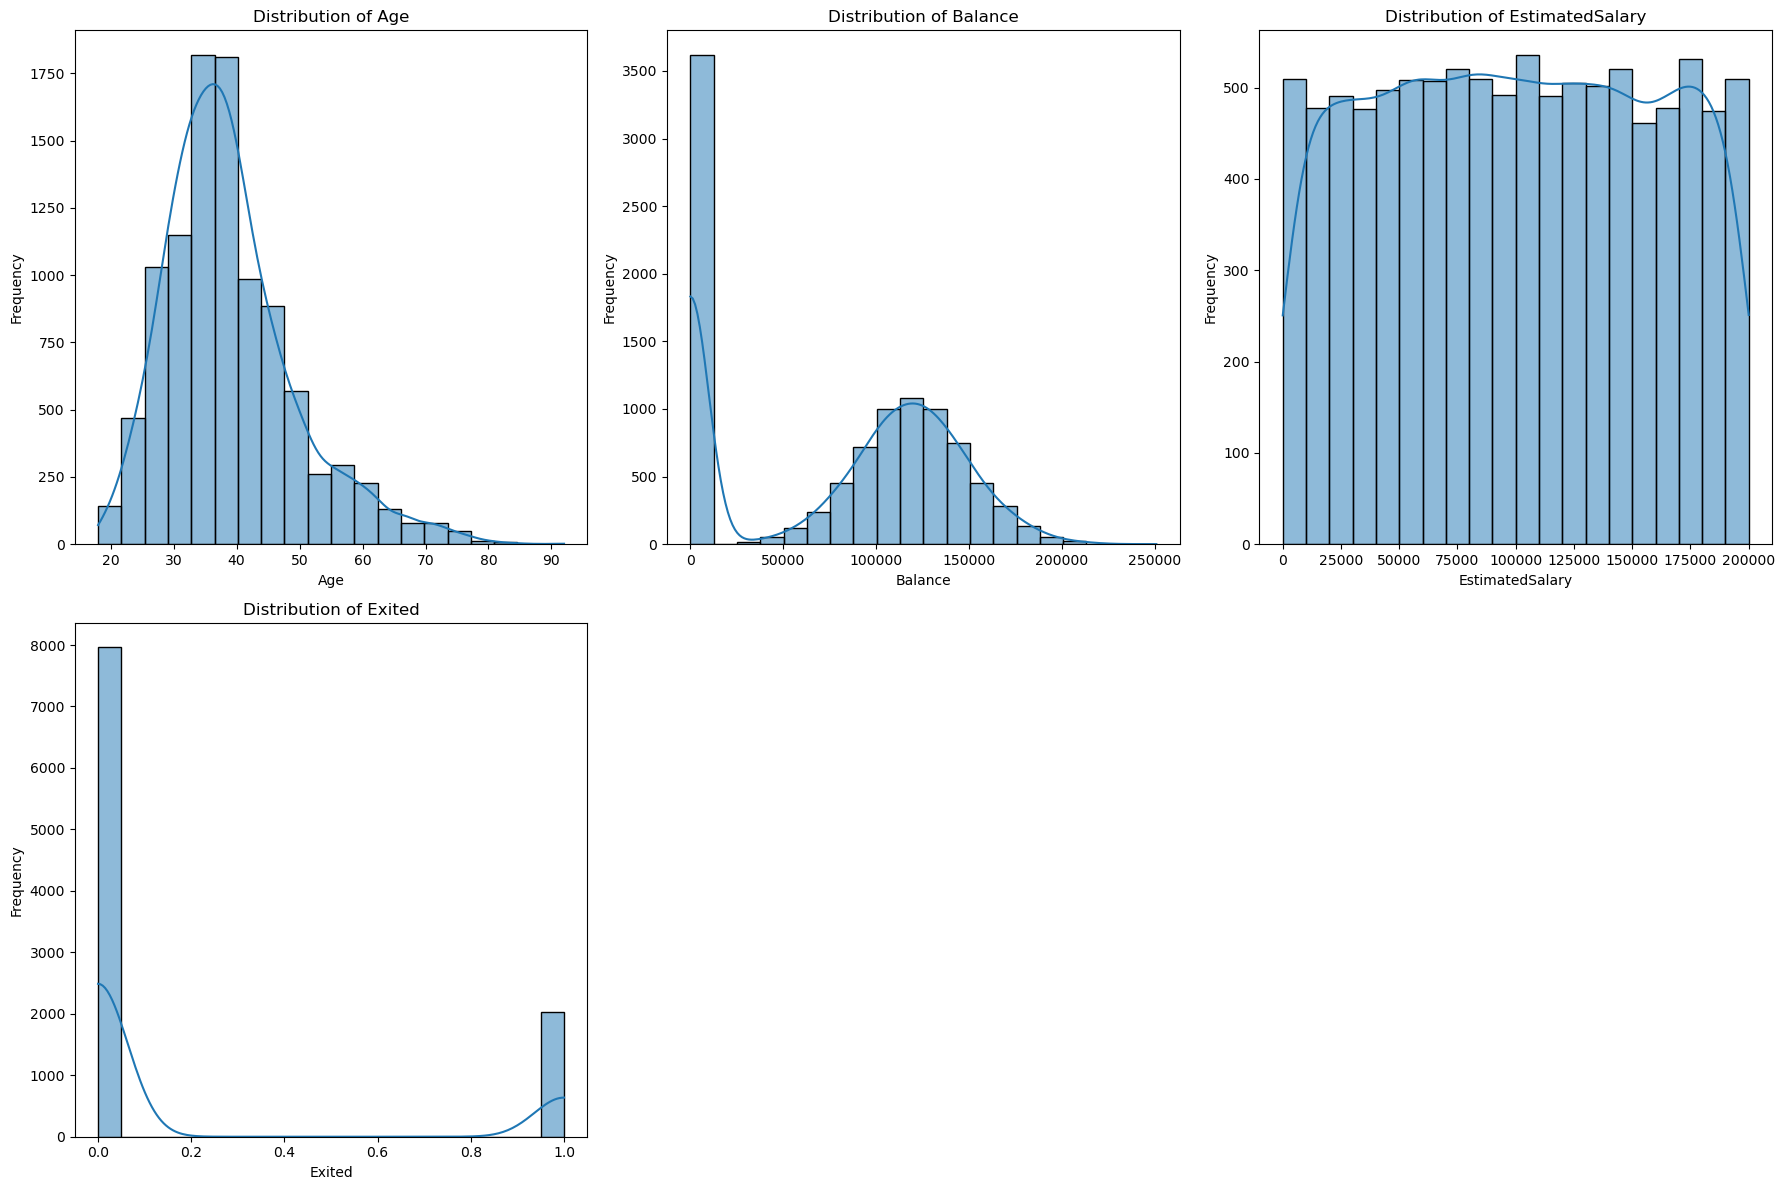

In [14]:
# List of columns to plot
columns_to_plot = ['Age', 'Balance', 'EstimatedSalary','Exited']

# Create the figure
plt.figure(figsize=(18, 12))

# Iterate through the columns and create subplots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  
    sns.histplot(df[column], kde=True, bins = 20)
    # plt.hist(heart_df[column], bins=20, edgecolor='black', color='y')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
cat_feats = df.select_dtypes(exclude = 'number').columns.tolist()
cat_feats

['Surname', 'Geography', 'Gender']

<Axes: xlabel='Gender'>

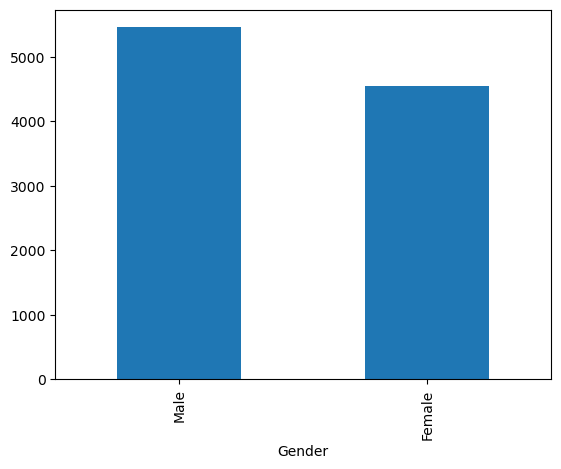

In [13]:
df['Gender'].value_counts().plot(kind = 'bar')

In [17]:
# preprocesing------

# check duplicates
df.duplicated().sum()

0

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'CreditScore'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Tenure'),
  Text(4, 0, 'Balance'),
  Text(5, 0, 'NumOfProducts'),
  Text(6, 0, 'HasCrCard'),
  Text(7, 0, 'IsActiveMember'),
  Text(8, 0, 'EstimatedSalary'),
  Text(9, 0, 'Exited')])

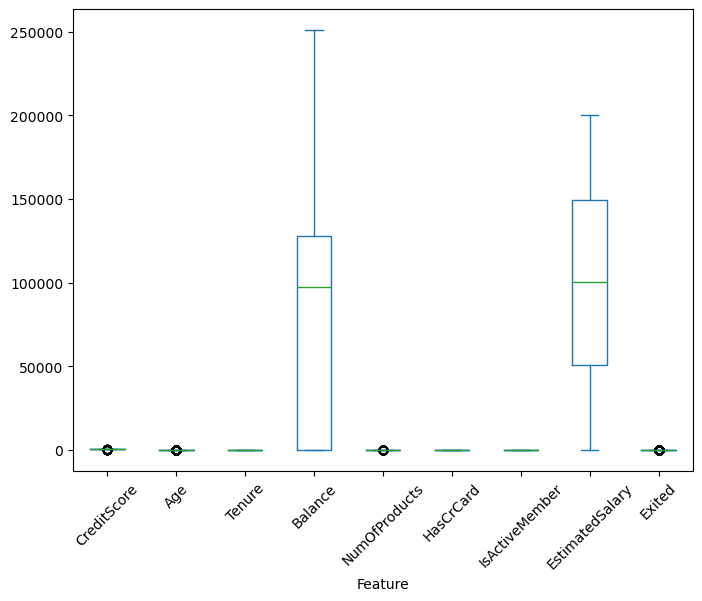

In [27]:
# check outliers
df.plot(kind = 'box', figsize=(8, 6))
plt.xlabel('Feature')
plt.xticks(rotation = 45)

In [23]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
df.drop(columns = ['Surname', 'Geography'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [36]:
# train test split
X = df.drop('Exited', axis = 1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

# preprocessing pipeline
num_feats = X.select_dtypes(include = 'number').columns.tolist()
num_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

cat_feats = df.select_dtypes(exclude = 'number').columns.tolist()
cat_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])



preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_feats),
    ('cat', cat_transformer, cat_feats)
])

In [37]:
num_feats

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [39]:
# fit and transform train and test sets
X_train_processed = preprocessor.fit_transform(X_train)

X_test_processed = preprocessor.transform(X_test)

# convert back to df
feature_names = preprocessor.get_feature_names_out()
X_train_final = pd.DataFrame(X_train_processed, columns = feature_names)

X_train_final

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Gender_Female,cat__Gender_Male
0,1.058568,1.715086,0.684723,-1.226059,-0.910256,0.641042,-1.030206,1.042084,0.0,1.0
1,0.913626,-0.659935,-0.696202,0.413288,-0.910256,0.641042,-1.030206,-0.623556,0.0,1.0
2,1.079274,-0.184931,-1.731895,0.601687,0.808830,0.641042,0.970680,0.308128,1.0,0.0
3,-0.929207,-0.184931,-0.005739,-1.226059,0.808830,0.641042,-1.030206,-0.290199,0.0,1.0
4,0.427035,0.955079,0.339492,0.548318,0.808830,-1.559960,0.970680,0.135042,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7995,0.385623,-0.374933,0.339492,-1.226059,-0.910256,0.641042,-1.030206,-1.294966,1.0,0.0
7996,0.634095,3.330101,-0.005739,-1.226059,0.808830,-1.559960,-1.030206,0.901685,0.0,1.0
7997,0.168210,-0.184931,1.375185,-0.073747,0.808830,0.641042,0.970680,-0.558088,1.0,0.0
7998,0.375270,-0.374933,1.029954,0.394991,0.808830,0.641042,-1.030206,-1.351500,0.0,1.0


In [44]:
# prediction
full_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 100, random_state = 42))
])

# ffit pipeline on training data
full_pipeline.fit(X_train, y_train)

# predictions
predictions = full_pipeline.predict(X_test)


# evluate
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.42      0.54       407

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000

